In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt

exec(open('utils.py').read())
print('Loaded')


def pct_dist(a, b):
    return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         percent_investment_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    return sq.dist_fn(total_investment * percent_investment_spent_this_year * percent_spend_on_compute * percent_compute_on_biggest_model,
                      fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                       percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                       percent_compute_on_biggest_model=pct_dist(0.02, 0.3))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=555410569
actual_gpt3_spend = 2.4*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend (${}M) is at the {}th percentile of the model'.format(round(actual_gpt3_spend / M, 1),
                                                                          round(np.mean([s <= np.log10(actual_gpt3_spend) for s in samples]) * 100, 1)))


{1: '201 thousand',
 5: '500 thousand',
 10: '806 thousand',
 20: '1 million',
 30: '2 million',
 40: '3 million',
 50: '4 million',
 60: '6 million',
 70: '9 million',
 80: '13 million',
 90: '23 million',
 95: '37 million',
 99: '87 million'}
-
Actual spend ($2.4M) is at the 32.6th percentile of the model


## GPT4 Prediction (for calibration)

In [3]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=10*B,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                       percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                       percent_compute_on_biggest_model=pct_dist(0.02, 0.3))
samples = gpt4_prediction @ (100*K)

# See: https://epochai.org/trends
actual_gpt4_spend = 40*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend (${}M) is at the {}th percentile of the model'.format(round(actual_gpt4_spend / M, 1),
                                                                          round(np.mean([s <= np.log10(actual_gpt4_spend) for s in samples]) * 100, 1)))


{1: '2 million',
 5: '5 million',
 10: '8 million',
 20: '14 million',
 30: '22 million',
 40: '31 million',
 50: '43 million',
 60: '60 million',
 70: '85 million',
 80: '129 million',
 90: '229 million',
 95: '366 million',
 99: '840 million'}
-
Actual spend ($40.0M) is at the 47.7th percentile of the model


## Gemini Ultra Prediction (for calibration)

In [4]:
gemini_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 40*B),
                                                             percent_r_and_d_on_ai=pct_dist(0.1, 0.7),
                                                             percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                             percent_compute_on_biggest_model=pct_dist(0.01, 0.1))
samples = gemini_prediction @ (100*K)

# See: https://epochai.org/trends
actual_gemini_spend = 60*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend (${}M) is at the {}th percentile of the model'.format(round(actual_gemini_spend / M, 1),
                                                                          round(np.mean([s <= np.log10(actual_gemini_spend) for s in samples]) * 100, 1)))


{1: '6 million',
 5: '15 million',
 10: '23 million',
 20: '40 million',
 30: '59 million',
 40: '83 million',
 50: '113 million',
 60: '155 million',
 70: '215 million',
 80: '318 million',
 90: '537 million',
 95: '824 million',
 99: '2 billion'}
-
Actual spend ($60.0M) is at the 30.4th percentile of the model


## Model for Largest Training Run in 2024

In [5]:
largest_openai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(20*B, 50*B),
                                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                       percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                       percent_compute_on_biggest_model=pct_dist(0.01, 0.7))
samples = largest_openai_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '2 million',
 5: '7 million',
 10: '14 million',
 20: '31 million',
 30: '56 million',
 40: '94 million',
 50: '150 million',
 60: '238 million',
 70: '393 million',
 80: '687 million',
 90: '1 billion',
 95: '2 billion',
 99: '5 billion'}


In [6]:
# https://www.nytimes.com/2023/01/27/technology/anthropic-ai-funding.html
# https://techcrunch.com/2023/04/06/anthropics-5b-4-year-plan-to-take-on-openai/
# https://twitter.com/AnthropicAI/status/1706202966238318670
largest_anthropic_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(5*B, 50*B),
                                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                          percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                          percent_compute_on_biggest_model=pct_dist(0.01, 0.7))
samples = largest_anthropic_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '824 thousand',
 5: '3 million',
 10: '6 million',
 20: '14 million',
 30: '26 million',
 40: '45 million',
 50: '74 million',
 60: '121 million',
 70: '202 million',
 80: '365 million',
 90: '798 million',
 95: '1 billion',
 99: '4 billion'}


In [7]:
# https://techcrunch.com/2023/06/29/inflection-ai-lands-1-3b-investment-to-build-more-personal-ai/
largest_inflection_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(2*B, 20*B),
                                                                           percent_investment_spent_this_year=pct_dist(0.1, 0.3),
                                                                           percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                           percent_compute_on_biggest_model=pct_dist(0.02, 0.3))
samples = largest_inflection_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '2 million',
 5: '4 million',
 10: '7 million',
 20: '12 million',
 30: '19 million',
 40: '28 million',
 50: '39 million',
 60: '55 million',
 70: '80 million',
 80: '124 million',
 90: '224 million',
 95: '369 million',
 99: '884 million'}


In [8]:
largest_google_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 50*B),
                                                                           percent_r_and_d_on_ai=pct_dist(0.1, 0.8),
                                                                           percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                           percent_compute_on_biggest_model=pct_dist(0.01, 0.3))
samples = largest_google_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '6 million',
 5: '16 million',
 10: '29 million',
 20: '60 million',
 30: '100 million',
 40: '154 million',
 50: '232 million',
 60: '347 million',
 70: '530 million',
 80: '875 million',
 90: '2 billion',
 95: '3 billion',
 99: '8 billion'}


In [9]:
largest_microsoft_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 50*B),
                                                                              percent_r_and_d_on_ai=pct_dist(0.1, 0.8),
                                                                              percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                              percent_compute_on_biggest_model=pct_dist(0.01, 0.3))
samples = largest_microsoft_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '6 million',
 5: '17 million',
 10: '30 million',
 20: '61 million',
 30: '100 million',
 40: '155 million',
 50: '232 million',
 60: '348 million',
 70: '529 million',
 80: '873 million',
 90: '2 billion',
 95: '3 billion',
 99: '8 billion'}


In [10]:
largest_fb_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 50*B),
                                                                       percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                                       percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                       percent_compute_on_biggest_model=pct_dist(0.01, 0.3))
samples = largest_fb_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '3 million',
 5: '9 million',
 10: '16 million',
 20: '34 million',
 30: '59 million',
 40: '93 million',
 50: '142 million',
 60: '217 million',
 70: '346 million',
 80: '586 million',
 90: '1 billion',
 95: '2 billion',
 99: '6 billion'}


In [11]:
us_gov_prediction = sq.mixture([[0.1, 0],
                                [0.6, sq.norm(6, 8, lclip=6)],
                                [0.3, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                               percent_r_and_d_on_ai=1,
                                                                               percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])
samples = us_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))


{1: 1.0,
 5: 1.0,
 10: '1 million',
 20: '3 million',
 30: '6 million',
 40: '10 million',
 50: '18 million',
 60: '36 million',
 70: '103 million',
 80: '409 million',
 90: '1 billion',
 95: '3 billion',
 99: '12 billion'}


In [12]:
uk_gov_prediction = sq.mixture([[0.6, sq.norm(8, 9, lclip=8)],
                                [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                               percent_r_and_d_on_ai=1,
                                                                               percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])
samples = uk_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '40 million',
 5: '100 million',
 10: '123 million',
 20: '183 million',
 30: '242 million',
 40: '308 million',
 50: '389 million',
 60: '501 million',
 70: '674 million',
 80: '1 billion',
 90: '2 billion',
 95: '5 billion',
 99: '15 billion'}


In [13]:
uae_gov_prediction = sq.mixture([[0.6, sq.norm(8, 9, lclip=8)],
                                 [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                                percent_r_and_d_on_ai=1,
                                                                                percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])
samples = uk_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '39 million',
 5: '100 million',
 10: '124 million',
 20: '185 million',
 30: '244 million',
 40: '311 million',
 50: '393 million',
 60: '503 million',
 70: '675 million',
 80: '1 billion',
 90: '2 billion',
 95: '5 billion',
 99: '15 billion'}


In [14]:
china_gov_prediction = sq.mixture([[0.05, 0],
                                   [0.55, sq.norm(6, 8, lclip=6)],
                                   [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B),
                                                                                  percent_r_and_d_on_ai=1,
                                                                                  percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                  percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])

# Adjust China's "effective US-equivalent" spend by export controls and other things
china_gov_prediction = china_gov_prediction - sq.norm(0.1, 0.5, lclip=0.05, rclip=1)

samples = china_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: 0.39319314059733423,
 5: 0.8912509381337456,
 10: '763 thousand',
 20: '2 million',
 30: '4 million',
 40: '8 million',
 50: '17 million',
 60: '47 million',
 70: '150 million',
 80: '406 million',
 90: '1 billion',
 95: '2 billion',
 99: '8 billion'}


In [15]:
mixed_model = (largest_openai_model_prediction >>
                    sq.dist_max(largest_anthropic_model_prediction) >>
                    sq.dist_max(largest_inflection_model_prediction) >>
                    sq.dist_max(largest_google_model_prediction) >>
                    sq.dist_max(largest_microsoft_model_prediction) >>
                    sq.dist_max(largest_fb_model_prediction) >>
                    sq.dist_max(us_gov_prediction) >>
                    sq.dist_max(uk_gov_prediction) >>
                    sq.dist_max(uae_gov_prediction) >>
                    sq.dist_max(china_gov_prediction))
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model @ (100*K)).items()]))

{1: '307 million',
 5: '488 million',
 10: '641 million',
 20: '918 million',
 30: '1 billion',
 40: '2 billion',
 50: '2 billion',
 60: '3 billion',
 70: '4 billion',
 80: '5 billion',
 90: '8 billion',
 95: '12 billion',
 99: '26 billion'}


## Cache spend model

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 2755920.30it/s]

Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 8.5,
 5: 8.7,
 10: 8.8,
 20: 9.0,
 30: 9.1,
 40: 9.2,
 50: 9.3,
 60: 9.4,
 70: 9.6,
 80: 9.7,
 90: 9.9,
 95: 10.1,
 99: 10.4}


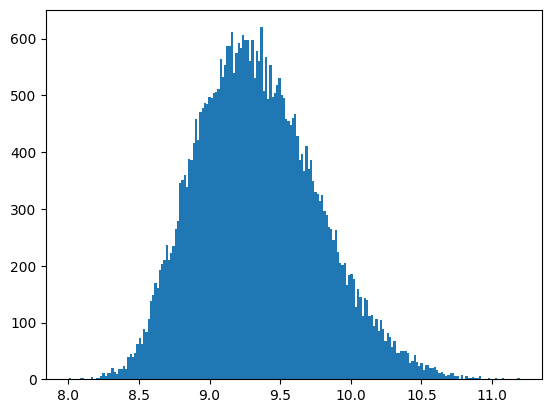

In [16]:
# Output expected willingness to pay for a model in 2024, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

In [17]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-12-26 13:42:13.978513
